In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()
import sys
sys.path.append('/home/yat-lok/workspace/tvbtools/')
# sys.path.append('/mnt/w/github/tvbtools/')
from tools.signaltools import SignalToolkit
import pandas as pd

In [2]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

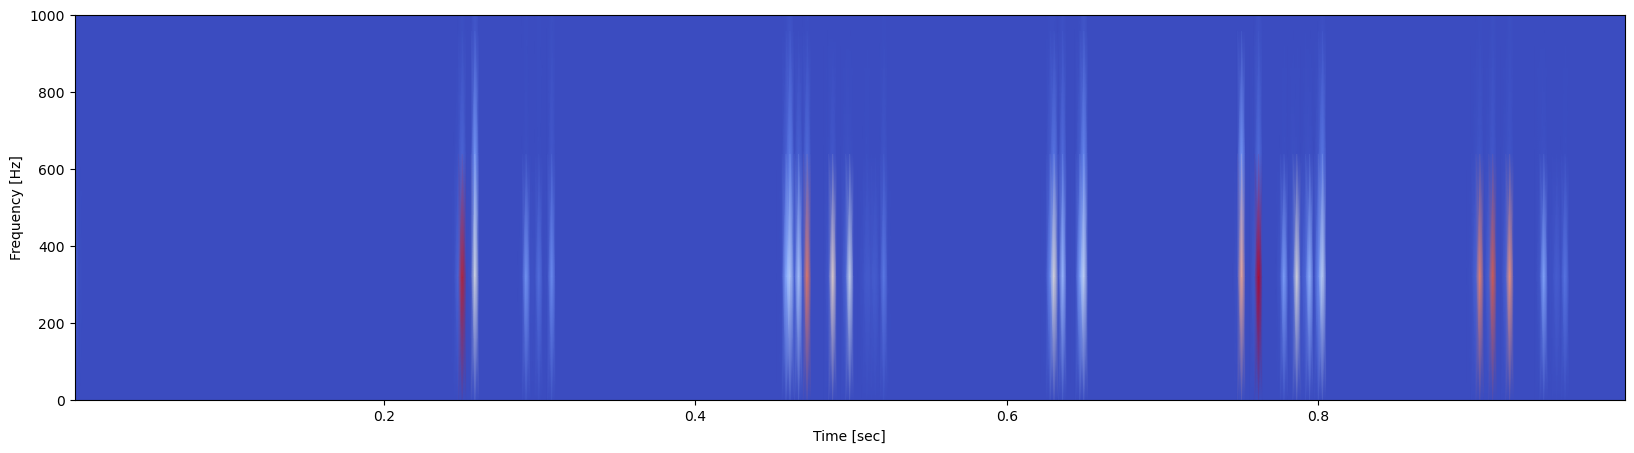

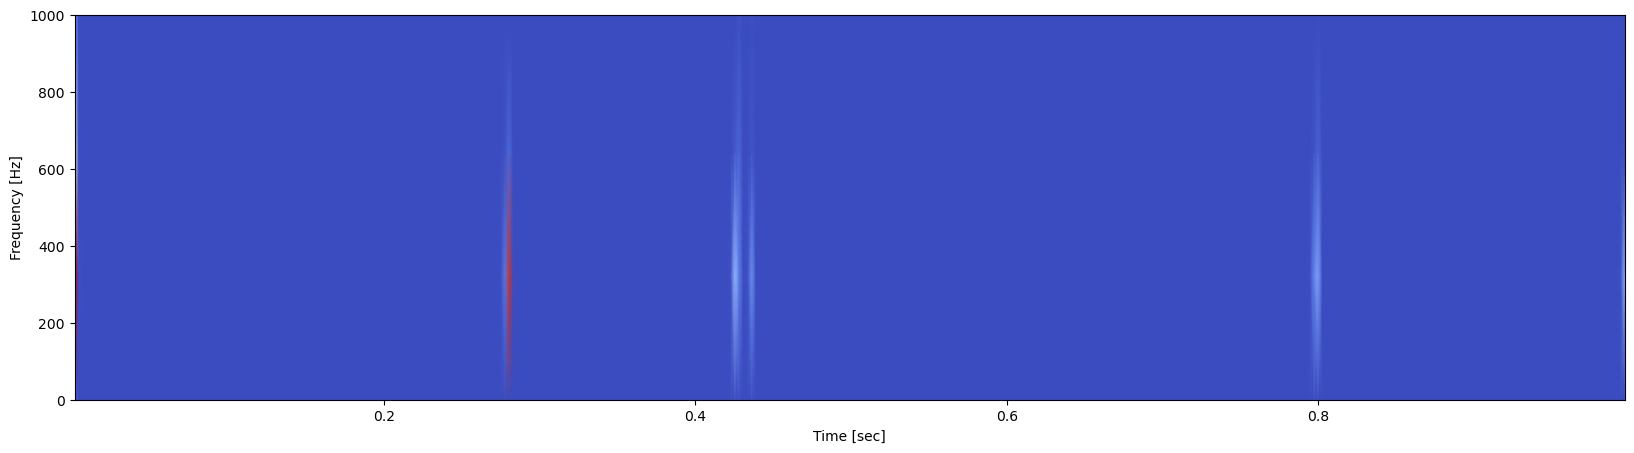

In [15]:
node_names = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMp-R','mTEMp-L','mTEMp-R']
fs = 81920.0
samplinginterval = 1/fs
t = np.arange(0, 1, samplinginterval)
grps = ['SNC','NC','MCI','AD']
col = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
# path = '/mnt/w/Gc_Go.xlsx'
path = '/home/yat-lok/workspace/data4project/lateralization/tvb_parameters.xlsx'
coData = pd.read_excel(path)


def spectro_gram(x, fs, visual=True):
    f, t, Sxx = signal.spectrogram(x, fs)
    if visual == True:
        fig = plt.figure(figsize=(20,5))
        axes = fig.add_subplot(111)
        axes.pcolormesh(t, f, Sxx, shading='gouraud', cmap = "coolwarm")
        axes.set_ylim([0, 1000])
        axes.set_ylabel('Frequency [Hz]')
        axes.set_xlabel('Time [sec]')
        plt.show()



def read_data(grp, caseid, amp='p2v'):
    gm = np.round(coData.loc[coData['caseid'] == caseid, 'Gc'].item(), 3)
    filename = '/home/yat-lok/workspace/data4project/lateralization/LFP_critical/'+str(grp)+'/'+str(caseid)+'_'+str(gm)+'.csv'
    # filename = '/mnt/w/gc3mins/'+grp+'/'+caseid+'.h5'
    subject = SignalToolkit(filename, 81920.)
    df = subject.data_reader()
    x_left = df[:,5]
    fil_left = SignalToolkit.sos_filter(x_left, win=[2,10], fs=fs)
    x_right = df[:,4]
    fil_right = SignalToolkit.sos_filter(x_right, win=[2,10], fs=fs)
    spectro_gram(fil_left, fs)
    spectro_gram(fil_right, fs)


    

read_data('SNC', '2820A')
